## PyCBC

Text(0.5, 1.0, 'SFR Madau Dickinson')

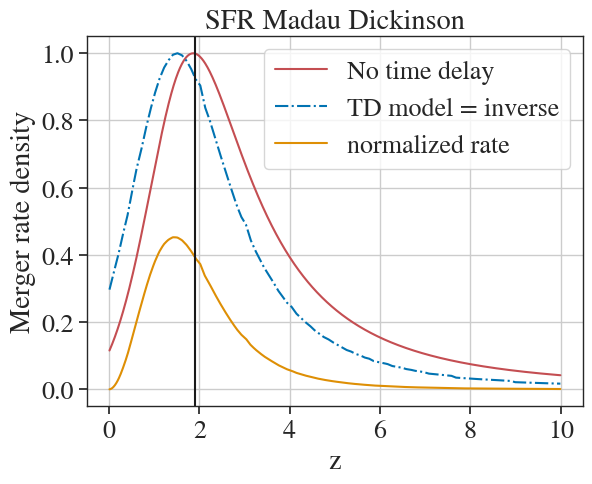

In [92]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
from pycbc.population.population_models import merger_rate_density, sfr_madau_dickinson_2014, coalescence_rate, norm_redshift_distribution
import numpy as np
import pylab as plt

z_arr = np.arange(0.01, 10, 0.01)
md_arr = sfr_madau_dickinson_2014(z_arr)
plt.plot(z_arr, md_arr/md_arr.max(), 'r', label='No time delay')
mrd_pycbc = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=22, npoints=100)
mrd_pycbc_arr = mrd_pycbc(z_arr)
mr_pycbc = coalescence_rate(mrd_pycbc)
nrd_pycbc = norm_redshift_distribution(z_arr, mr_pycbc)
plt.plot(z_arr, mrd_pycbc_arr/mrd_pycbc_arr.max(), '-.', label='TD model = inverse')
plt.plot(z_arr, nrd_pycbc, label='normalized rate')
plt.xlabel('z')
plt.ylabel('Merger rate density')
plt.grid()
plt.legend()
plt.axvline(1.9, c='k')
plt.title('SFR Madau Dickinson')

## GWForge

In [37]:
from GWForge.population.redshift import Redshift
import bilby

gwf_z = Redshift(redshift_model='MadauDickinson', 
                 local_merger_rate_density=22, 
                 maximum_redshift=10, 
                 gps_start_time=0)
gwf_z_prob = gwf_z.coalescence_rate()

z_grid = np.arange(0, 10, 0.001)
p_z = bilby.core.prior.Interped(z_grid, gwf_z_prob(z_grid))

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:12

In [46]:
gwf_mrd = gwf_z.rate_density()
gwf_mrd_interp = bilby.core.prior.Interped(z_grid, gwf_mrd(z_grid))

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:11

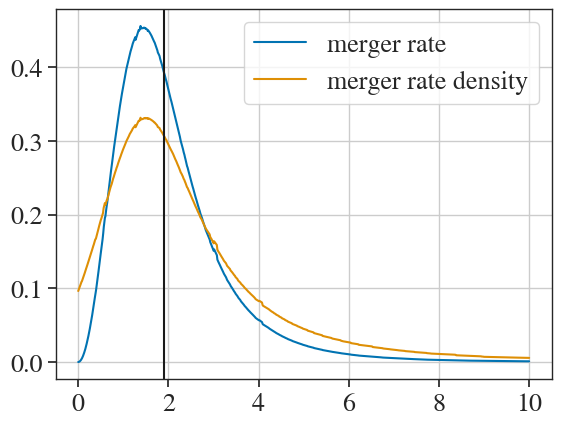

In [60]:
plt.plot(z_grid, p_z.probability_density(z_grid), label='merger rate')
plt.plot(z_grid, gwf_mrd_interp.probability_density(z_grid), label='merger rate density')
plt.grid()
plt.axvline(1.9, c='k')
plt.legend()

## gwpopulation

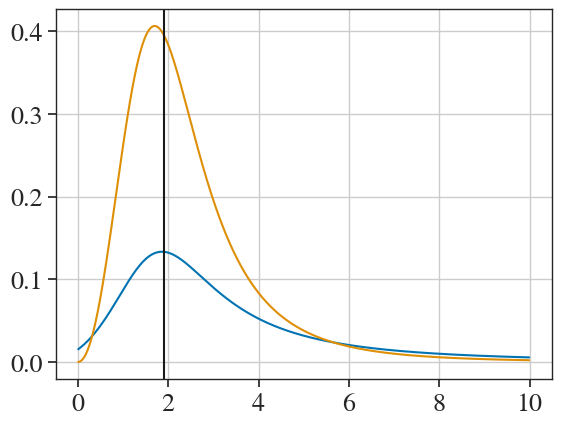

In [95]:
from gwpopulation.models.redshift import MadauDickinsonRedshift
z_arr = np.arange(0.01, 10, 0.01)
gwpop_MDR = MadauDickinsonRedshift(z_max=10)
gwpop_mr = gwpop_MDR(dataset={'redshift':z_arr}, gamma=2.7, kappa=5.6, z_peak=1.9)
psi_of_z = 0.015 * gwpop_MDR.psi_of_z(redshift=z_arr, gamma=2.7, kappa=5.6, z_peak=1.9)
plt.plot(z_arr, psi_of_z)
plt.plot(z_arr, gwpop_mr)
plt.grid()
plt.axvline(1.9, c='k')

## Simple PE

In [49]:
from simple_pe import cosmology

In [72]:
cosmology.rate_at_redshift(1, r0=22, z_max=10)

11913.360978663959